In [1]:
# https://www.kaggle.com/c/titanic
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv")
data_train.columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


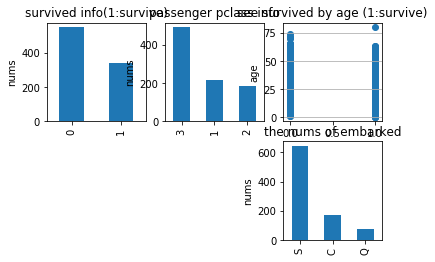

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"survived info(1:survive)") # puts a title on our graph
plt.ylabel(u"nums") 

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"nums")
plt.title(u"passenger pclass info")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"see survived by age (1:survive)")

# plt.subplot2grid((2,3),(1,0), colspan=2)
# data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
# data_train.Age[data_train.Pclass == 2].plot(kind='kde')
# data_train.Age[data_train.Pclass == 3].plot(kind='kde')
# plt.xlabel(u"age")# plots an axis lable
# plt.ylabel(u"midu") 
# plt.title(u"age info")
# plt.legend((u'1 class', u'2 class',u'3 class'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"the nums of embarked")
plt.ylabel(u"nums")  
plt.show()

<Figure size 432x288 with 0 Axes>

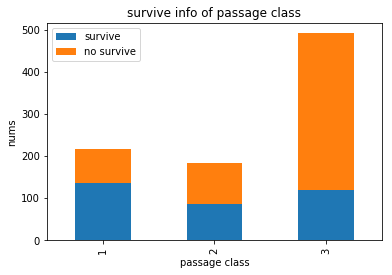

In [6]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survive':Survived_1, u'no survive':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survive info of passage class")
plt.xlabel(u"passage class") 
plt.ylabel(u"nums") 

plt.show()

<Figure size 432x288 with 0 Axes>

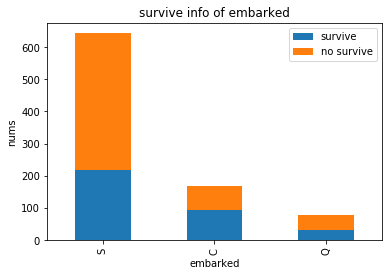

In [7]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survive':Survived_1, u'no survive':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survive info of embarked")
plt.xlabel(u"embarked") 
plt.ylabel(u"nums") 

plt.show()

<Figure size 432x288 with 0 Axes>

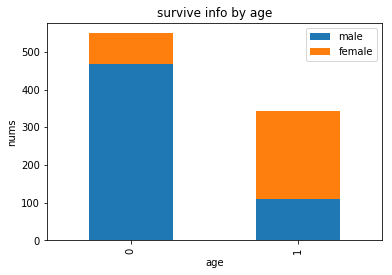

In [8]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"survive info by age")
plt.xlabel(u"age") 
plt.ylabel(u"nums")
plt.show()

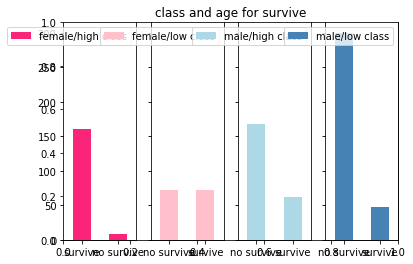

In [9]:

#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"class and age for survive")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"survive", u"no survive"], rotation=0)
ax1.legend([u"female/high class"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"no survive", u"survive"], rotation=0)
plt.legend([u"female/low class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"no survive", u"survive"], rotation=0)
plt.legend([u"male/high class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"no survive", u"survive"], rotation=0)
plt.legend([u"male/low class"], loc='best')

plt.show()

In [10]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [11]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [12]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

/home/huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.828953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [13]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [14]:

# 接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df

/home/huang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/huang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/huang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.427102,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787727,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029545,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194318,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148636,-0.042956


In [15]:

# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

/home/huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [16]:

data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test

/home/huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/huang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/huang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/huang/anaconda3/lib/python3.6/site-packages/sklearn/preproc

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248326,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.033996,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337578,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944743,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717056,-0.204154


In [17]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

/home/huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
pd.read_csv("logistic_regression_predictions.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [19]:
# https://www.kaggle.com/goldens/classification-81-3-with-simple-model-nested-cv
# In this kernel I intend to use nested cross validation to choose between Random Forest and SVM.
# Steps:
# 1- Preprocessing and exploring
# 1.1- Imports
# 1.2- Types
# 1.3 - Missing Values
# 1.4 - Exploring
# 1.5 - Feature Engineering
# 1.6 - Prepare for models
# 2- Nested Cross Validation
# 3- Submission

In [20]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings

In [22]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test2=pd.read_csv("test.csv")
titanic=pd.concat([train, test], sort=False)
len_train=train.shape[0]

In [26]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
# Types
titanic.dtypes.sort_values()

PassengerId      int64
Pclass           int64
SibSp            int64
Parch            int64
Survived       float64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object

In [28]:
titanic.select_dtypes(include='int').head()

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0


In [29]:
titanic.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [30]:
titanic.select_dtypes(include='float').head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [31]:
titanic.isnull().sum()[titanic.isnull().sum()>0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [32]:
# Fare
train.Fare=train.Fare.fillna(train.Fare.mean())
test.Fare=test.Fare.fillna(train.Fare.mean())
# Cabin
train.Cabin=train.Cabin.fillna("unknow")
test.Cabin=test.Cabin.fillna("unknow")
# Embarked
train.Embarked=train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked=test.Embarked.fillna(train.Embarked.mode()[0])

In [33]:
# Age
train['title']=train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
test['title']=test.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [35]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

In [36]:
train['title']=train.title.map(newtitles)
test['title']=test.title.map(newtitles)

In [37]:
train.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [39]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age

In [40]:
train.Age=train[['title','Sex','Age']].apply(newage, axis=1)
test.Age=test[['title','Sex','Age']].apply(newage, axis=1)

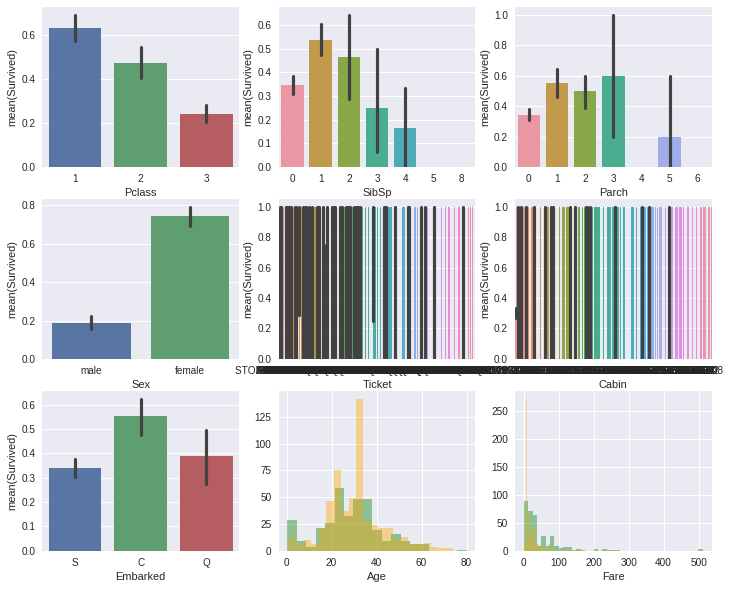

In [41]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(3,3,1)
sns.barplot('Pclass','Survived',data=train)
plt.subplot(3,3,2)
sns.barplot('SibSp','Survived',data=train)
plt.subplot(3,3,3)
sns.barplot('Parch','Survived',data=train)
plt.subplot(3,3,4)
sns.barplot('Sex','Survived',data=train)
plt.subplot(3,3,5)
sns.barplot('Ticket','Survived',data=train)
plt.subplot(3,3,6)
sns.barplot('Cabin','Survived',data=train)
plt.subplot(3,3,7)
sns.barplot('Embarked','Survived',data=train)
plt.subplot(3,3,8)
sns.distplot(train[train.Survived==1].Age, color='green', kde=False)
sns.distplot(train[train.Survived==0].Age, color='orange', kde=False)
plt.subplot(3,3,9)
sns.distplot(train[train.Survived==1].Fare, color='green', kde=False)
sns.distplot(train[train.Survived==0].Fare, color='orange', kde=False)

In [42]:
train['Relatives']=train.SibSp+train.Parch
test['Relatives']=test.SibSp+test.Parch

train['Ticket2']=train.Ticket.apply(lambda x : len(x))
test['Ticket2']=test.Ticket.apply(lambda x : len(x))

train['Cabin2']=train.Cabin.apply(lambda x : len(x))
test['Cabin2']=test.Cabin.apply(lambda x : len(x))

train['Name2']=train.Name.apply(lambda x: x.split(',')[0].strip())
test['Name2']=test.Name.apply(lambda x: x.split(',')[0].strip())

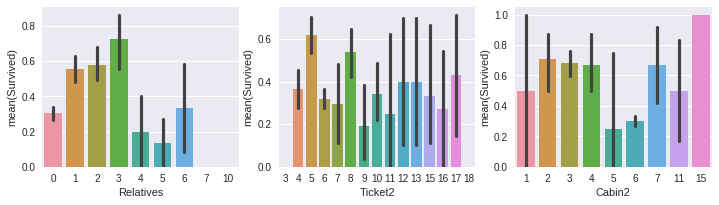

In [43]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(3,3,1)
sns.barplot('Relatives','Survived',data=train)
plt.subplot(3,3,2)
sns.barplot('Ticket2','Survived',data=train)
plt.subplot(3,3,3)
sns.barplot('Cabin2','Survived',data=train)

In [44]:
#droping features I won't use in model
#train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin']
train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [46]:
titanic=pd.concat([train, test], sort=False)
titanic=pd.get_dummies(titanic)
train=titanic[:len_train]
test=titanic[len_train:]
# Lets change type of target
train.Survived=train.Survived.astype('int')
train.Survived.dtype

dtype('int64')

In [47]:
xtrain=train.drop("Survived",axis=1)
ytrain=train['Survived']
xtest=test.drop("Survived", axis=1)

In [48]:
RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,xtrain,ytrain,scoring='accuracy',cv=5)

In [49]:
np.mean(scores_rf)

0.7866456934513139

In [50]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, xtrain.astype(float), ytrain,scoring='accuracy', cv=5)

In [51]:
np.mean(scores_svm)

0.8439879324218461

In [52]:
model=GSSVM.fit(xtrain, ytrain)

In [53]:
pred=model.predict(xtest)

In [54]:
output=pd.DataFrame({'PassengerId':test2['PassengerId'],'Survived':pred})

In [55]:
output.to_csv('submission.csv', index=False)